In [1]:
import pandas as pd
from tslearn.metrics import dtw
import numpy as np
from sklearn import manifold
from sklearn import preprocessing
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('preprocessed_normalized_data.csv')
df.head()

,Unnamed: 0,Country Name,Indicator Name,1989,1990,1991,1992,1993,1994,1995,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,0,Algeria,Adjusted net national income (constant 2010 US$),2.052023e+06,2.012271e+06,1.975446e+06,1.908694e+06,1.729186e+06,1.689777e+06,1.661869e+06,...,3.401323e+06,3.396150e+06,3.589790e+06,3.548539e+06,3.503132e+06,3.325664e+06,3.495184e+06,3.490920e+06,3.423912e+06,NaN
1,1,Algeria,Age dependency ratio (% of working-age populat...,8.952999e+01,8.764613e+01,8.577588e+01,8.375662e+01,8.157296e+01,7.918647e+01,7.658746e+01,...,4.867454e+01,4.921309e+01,4.977822e+01,5.049722e+01,5.150919e+01,5.283779e+01,5.418401e+01,5.580400e+01,5.750803e+01,5.899049e+01
2,2,Algeria,Agricultural land (sq. km),1.627382e-01,1.623855e-01,1.621588e-01,1.631790e-01,1.631664e-01,1.664329e-01,1.664707e-01,...,1.737133e-01,1.737721e-01,1.738149e-01,1.739553e-01,1.739527e-01,1.740593e-01,1.736554e-01,NaN,NaN,NaN
3,3,Algeria,Consumer price index (2010 = 100),1.330392e+01,1.551936e+01,1.953677e+01,2.572399e+01,3.100779e+01,4.001482e+01,5.193109e+01,...,1.000000e+02,1.045242e+02,1.138179e+02,1.175218e+02,1.209499e+02,1.267366e+02,1.348449e+02,1.423842e+02,1.484640e+02,1.513617e+02
4,4,Algeria,Exports of goods and services (constant 2010 US$),1.754021e+06,1.767704e+06,1.709221e+06,1.734628e+06,1.664282e+06,1.574746e+06,1.642288e+06,...,1.722062e+06,1.638994e+06,1.546543e+06,1.429473e+06,1.403499e+06,1.381959e+06,1.448672e+06,1.332768e+06,1.257948e+06,1.158589e+06


In [3]:
df = df.fillna(0.0)

In [4]:
df['Indicator Name'].unique()

array(['Adjusted net national income (constant 2010 US$)',
       'Age dependency ratio (% of working-age population)',
       'Agricultural land (sq. km)', 'Consumer price index (2010 = 100)',
       'Exports of goods and services (constant 2010 US$)',
       'Fertility rate, total (births per woman)',
       'GDP (constant 2010 US$)', 'Land area (sq. km)',
       'Life expectancy at birth, total (years)',
       'Mortality rate, under-5 (per 1,000 live births)',
       'Population density (people per sq. km of land area)',
       'Population, total', 'Urban population (% of total population)'],
      dtype=object)

In [5]:
indicators = list(df['Indicator Name'].unique())

In [6]:
def prepare_referal_distances(df, country):
    result = dict()
    for indicator in indicators:
        df_country = df[df['Country Name']==country]
        row = df_country[df_country['Indicator Name']==indicator]
        time_series = row.values[:,3:]
        distance_dtw = dtw(time_series, np.zeros(time_series.shape))
        result[indicator] = distance_dtw
    return result

In [7]:
df_distances = list()
for country in list(df['Country Name'].unique()):
    result_dict = prepare_referal_distances(df, country)
    df_distances.append(result_dict)
df_distances = pd.DataFrame(df_distances)
df_distances.sample(5)

,Adjusted net national income (constant 2010 US$),Age dependency ratio (% of working-age population),Agricultural land (sq. km),Consumer price index (2010 = 100),Exports of goods and services (constant 2010 US$),"Fertility rate, total (births per woman)",GDP (constant 2010 US$),Land area (sq. km),"Life expectancy at birth, total (years)","Mortality rate, under-5 (per 1,000 live births)",Population density (people per sq. km of land area),"Population, total",Urban population (% of total population)
41,1.972427e+07,348.966970,1.852198,972.233554,8.305366e+06,14.424381,3.080476e+07,8.921086e+06,390.182477,186.891386,231.760320,3.864807e+08,370.723230
63,3.291141e+08,296.303350,0.148616,505.057999,1.892356e+08,10.061918,4.568793e+08,2.000391e+06,436.146021,27.385398,70.211418,2.619411e+07,429.937008
87,4.541230e+07,316.296769,2.729266,533.123246,1.210828e+07,13.514244,5.739216e+07,4.215437e+06,390.907884,223.180039,478.921775,3.779166e+08,375.438877
26,2.396277e+07,351.634926,2.700511,437.458745,7.337292e+06,15.341677,2.763486e+07,2.646048e+05,385.251573,230.823959,1013.594865,5.013053e+07,376.668240
3,1.969082e+08,268.565975,1.848118,513.147921,1.145592e+08,7.852312,2.408289e+08,4.522374e+05,432.087751,32.351661,543.710145,4.576068e+07,331.918920


In [8]:
df_distances.sample(5)

,Adjusted net national income (constant 2010 US$),Age dependency ratio (% of working-age population),Agricultural land (sq. km),Consumer price index (2010 = 100),Exports of goods and services (constant 2010 US$),"Fertility rate, total (births per woman)",GDP (constant 2010 US$),Land area (sq. km),"Life expectancy at birth, total (years)","Mortality rate, under-5 (per 1,000 live births)",Population density (people per sq. km of land area),"Population, total",Urban population (% of total population)
44,1.610020e+08,281.887486,2.684763,496.135196,4.790786e+07,7.241139,1.939267e+08,1.610994e+06,440.081395,32.612881,1083.077125,3.243531e+08,378.505766
61,7.312937e+06,492.083193,4.032767,591.360742,2.882607e+06,32.931954,1.061185e+07,4.988493e+06,267.085623,934.149201,847.753421,7.978331e+08,220.431620
38,4.961184e+07,264.287247,3.457302,440.530222,5.003263e+07,8.000544,6.740147e+07,4.929840e+05,397.162235,55.605036,615.445506,5.630816e+07,374.667080
93,5.068535e+06,318.497909,1.581496,500.123643,6.085774e+06,12.956295,6.457951e+06,1.730217e+06,402.269253,176.268999,1439.328478,4.626730e+08,154.360370
84,1.920354e+07,244.775094,2.152869,485.668944,1.552458e+07,9.344620,2.487434e+07,2.798260e+06,397.144855,121.975653,685.921075,3.572801e+08,214.741507


In [9]:
array = df_distances.values
array_scaled = preprocessing.scale(array)
X = array_scaled

C:\Users\Sprzetowo\anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:174: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "


In [10]:
X.std()
X.mean()

5.451176880319917e-18

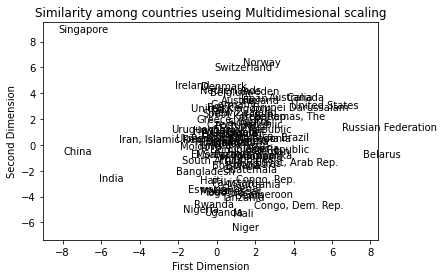

In [11]:
mds_model = manifold.MDS(n_components = 2, random_state = 123)
mds_fit = mds_model.fit(X)  
mds_coords = mds_model.fit_transform(X) 
                                                                                                                                  
country_names = list(df['Country Name'].unique())
plt.figure()
plt.scatter(mds_coords[:,0],mds_coords[:,1],
    facecolors = 'none', edgecolors = 'none')  # points in white (invisible)
labels = country_names
for label, x, y in zip(labels, mds_coords[:,0], mds_coords[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('Similarity among countries using Multidimesional scaling')

plt.savefig('MultidimensionalScaling.png')
plt.show()

In [11]:
def prepare_distance_matrix(df, indicator):
    df_indicator = df[df['Indicator Name']==indicator]
    time_series = df_indicator.values[:,3:]
    distance_matrix = pairwise_distances(time_series)
    #print(distance_matrix)
    return distance_matrix

In [12]:
dis_matrix = prepare_distance_matrix(df, indicators[1])


In [15]:
def prepare_visualization(dis_matrix, indicator):
    mds_model = manifold.MDS(n_components = 2, random_state = 123, dissimilarity = 'precomputed')
    mds_fit = mds_model.fit(dis_matrix)  
    mds_coords = mds_model.fit_transform(dis_matrix) 

    plt.rcParams["figure.figsize"] = (20,10)
    country_names = list(df['Country Name'].unique())
    plt.figure()
    plt.scatter(mds_coords[:,0],mds_coords[:,1],
        facecolors = 'none', edgecolors = 'none')  # points in white (invisible)
    labels = country_names
    for label, x, y in zip(labels, mds_coords[:,0], mds_coords[:,1]):
        plt.annotate(label, (x,y), xycoords = 'data')
    
    plt.xlabel('First Dimension')
    plt.ylabel('Second Dimension')
    plt.title('Similarity among countries using Multidimesional scaling for ' + indicator)
    plt.savefig('MultidimensionalScaling' + indicator.split()[0] + 'normalized_dpi500' + '.png', format='png', dpi=500)
    plt.show()
    plt.clf()

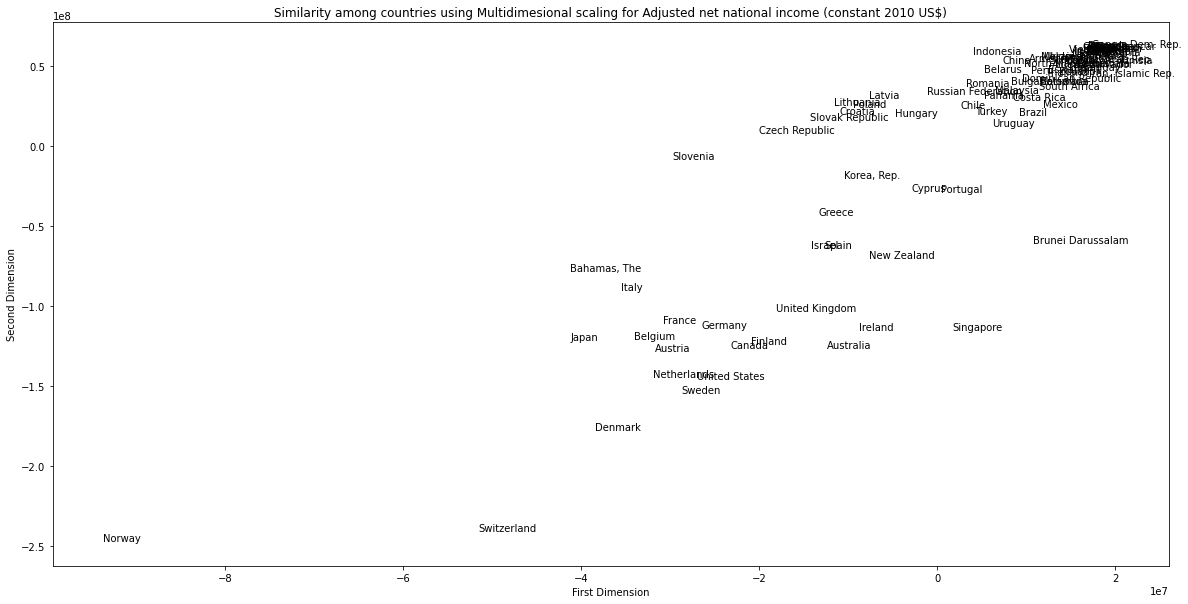

<Figure size 1440x720 with 0 Axes>

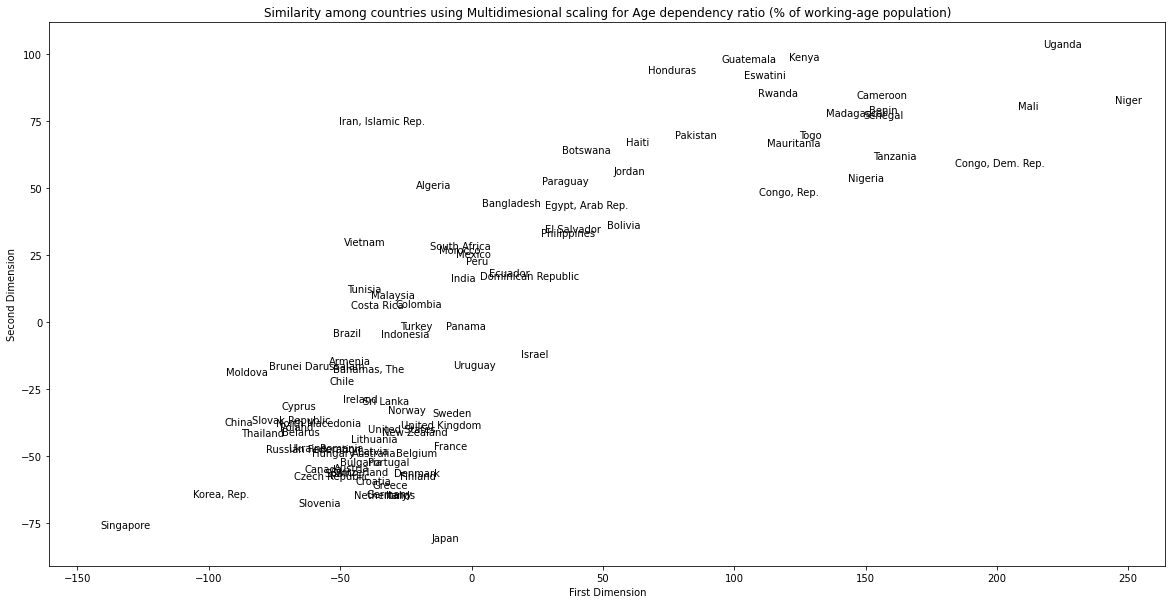

<Figure size 1440x720 with 0 Axes>

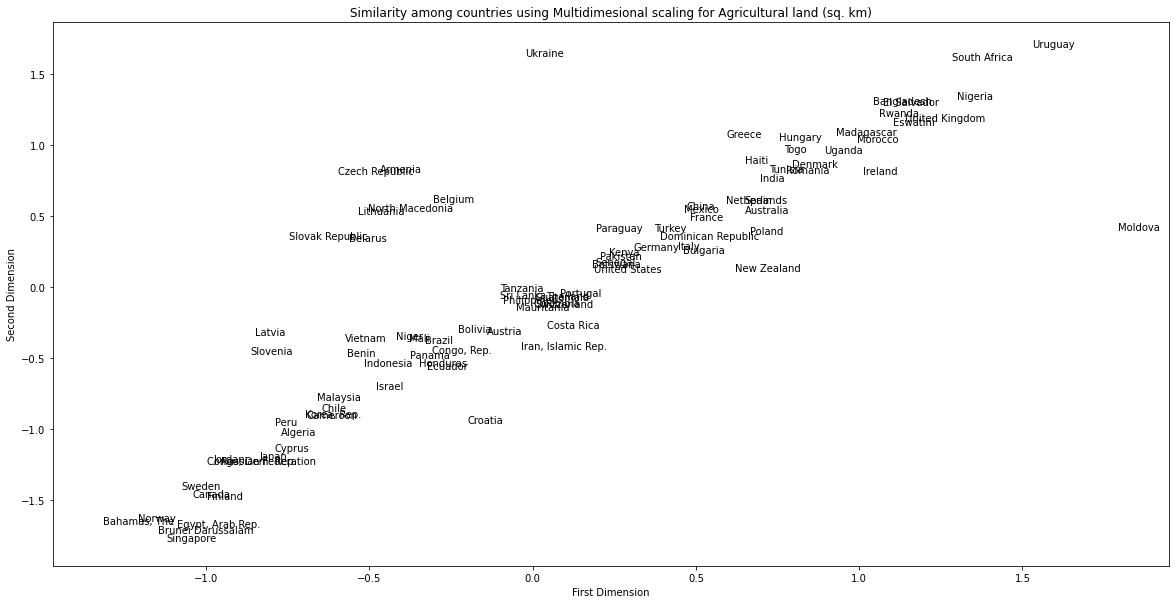

<Figure size 1440x720 with 0 Axes>

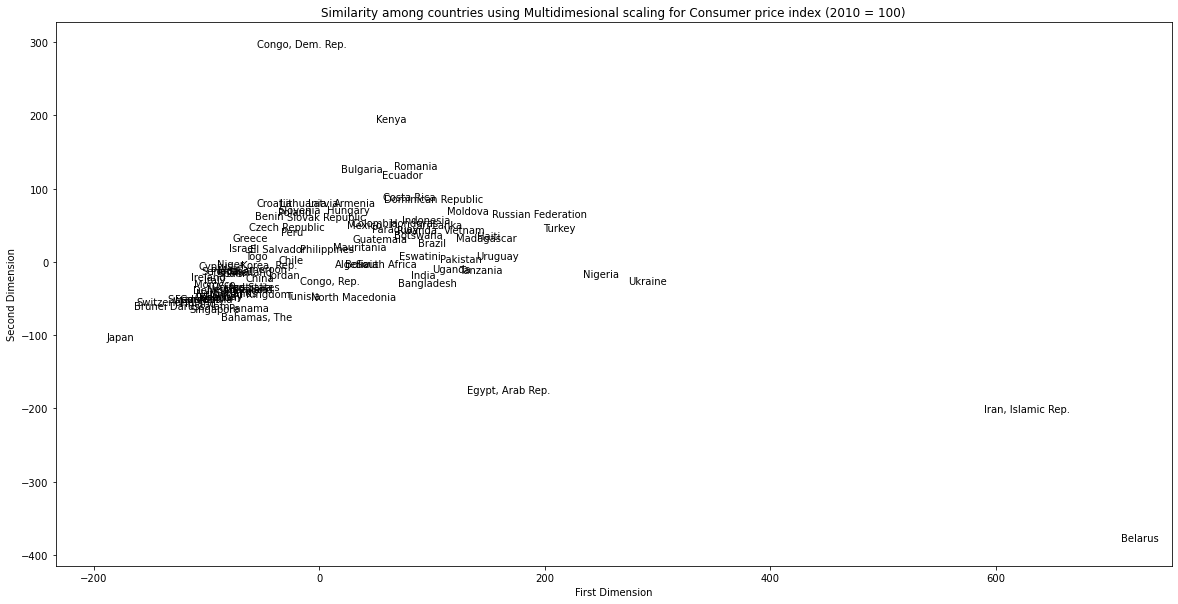

<Figure size 1440x720 with 0 Axes>

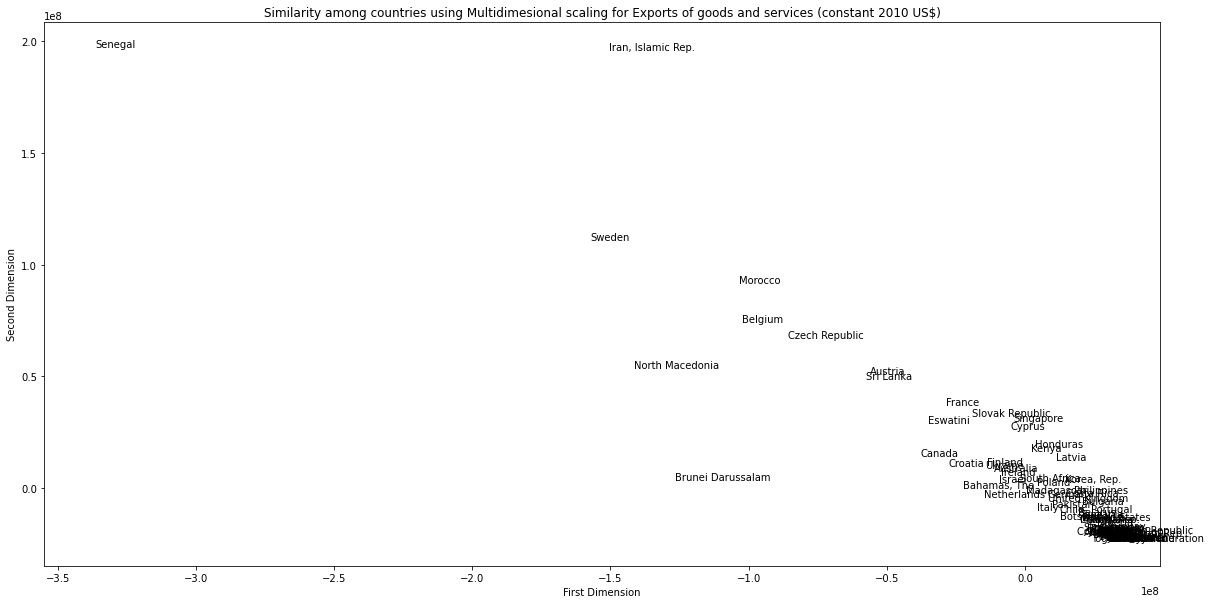

<Figure size 1440x720 with 0 Axes>

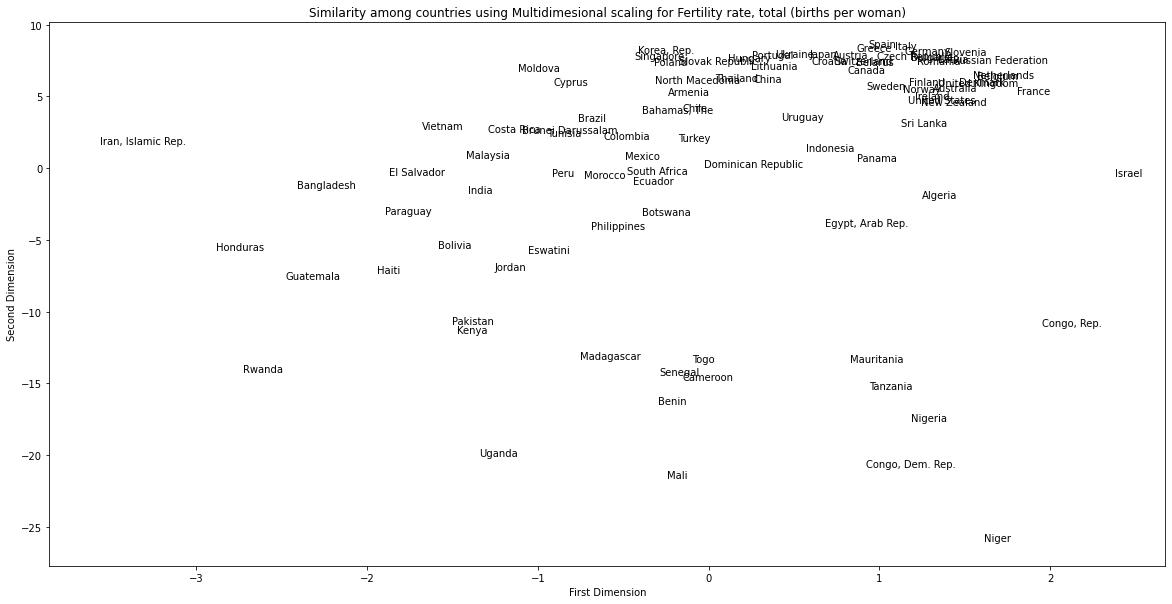

<Figure size 1440x720 with 0 Axes>

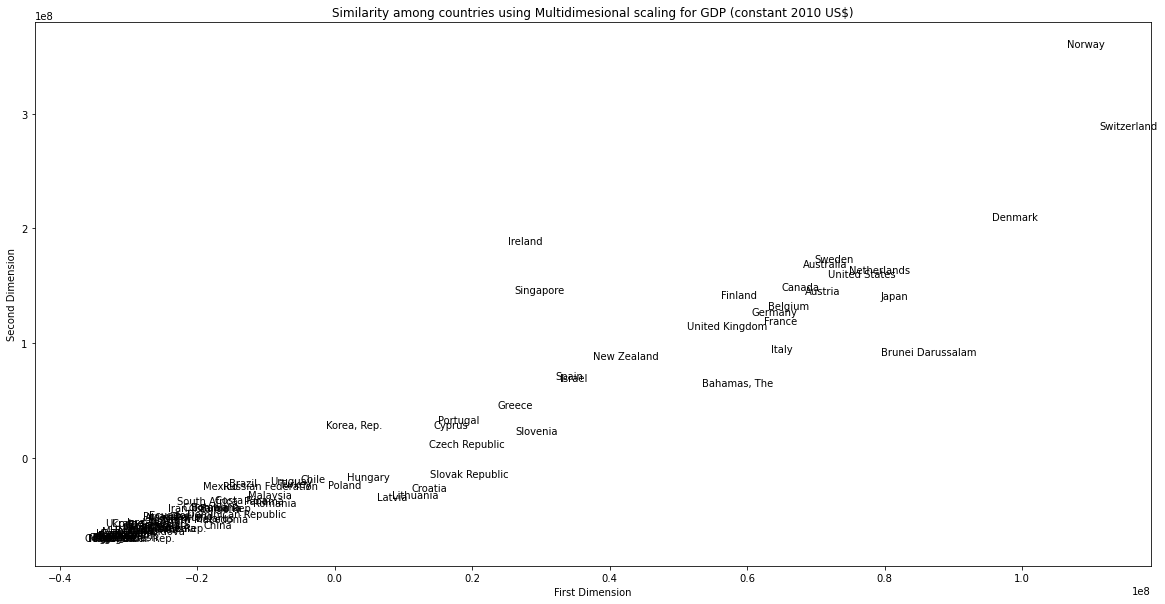

<Figure size 1440x720 with 0 Axes>

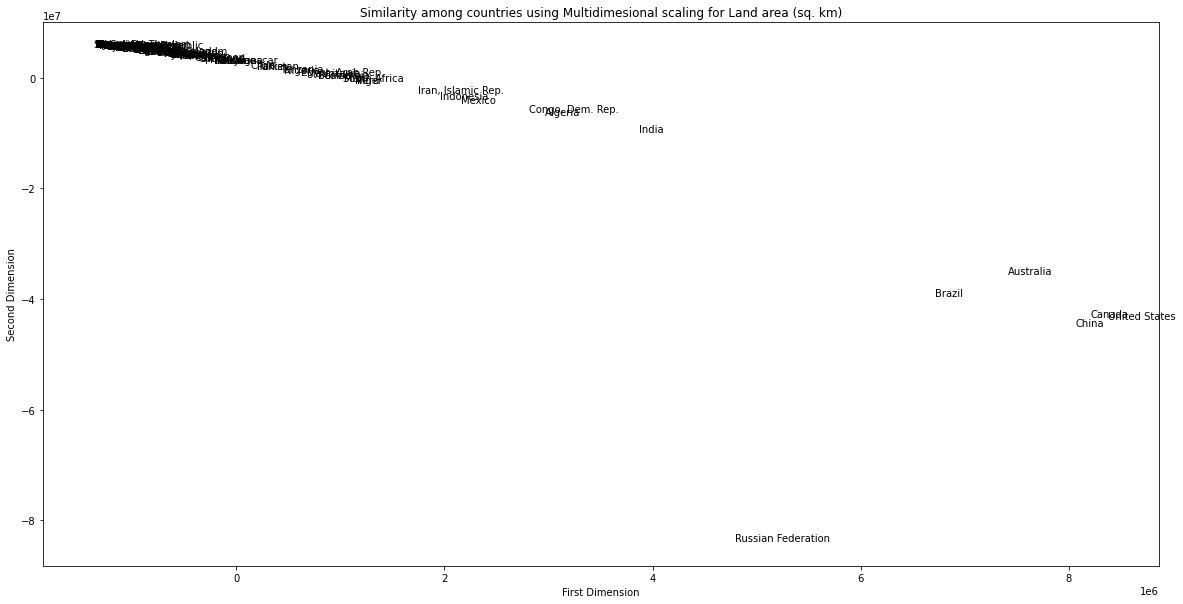

<Figure size 1440x720 with 0 Axes>

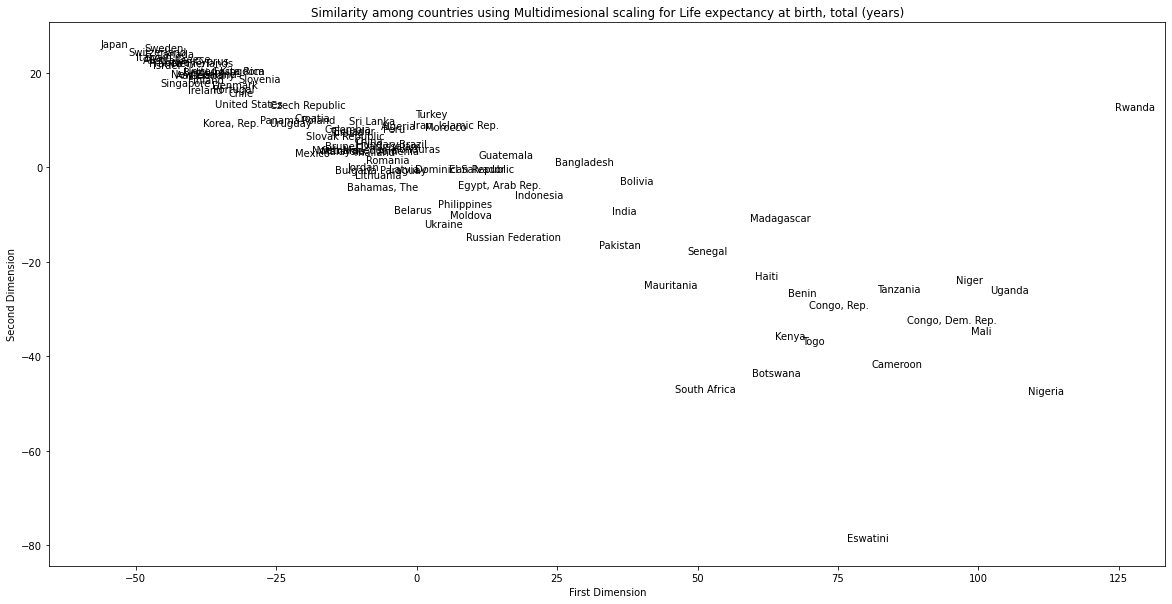

<Figure size 1440x720 with 0 Axes>

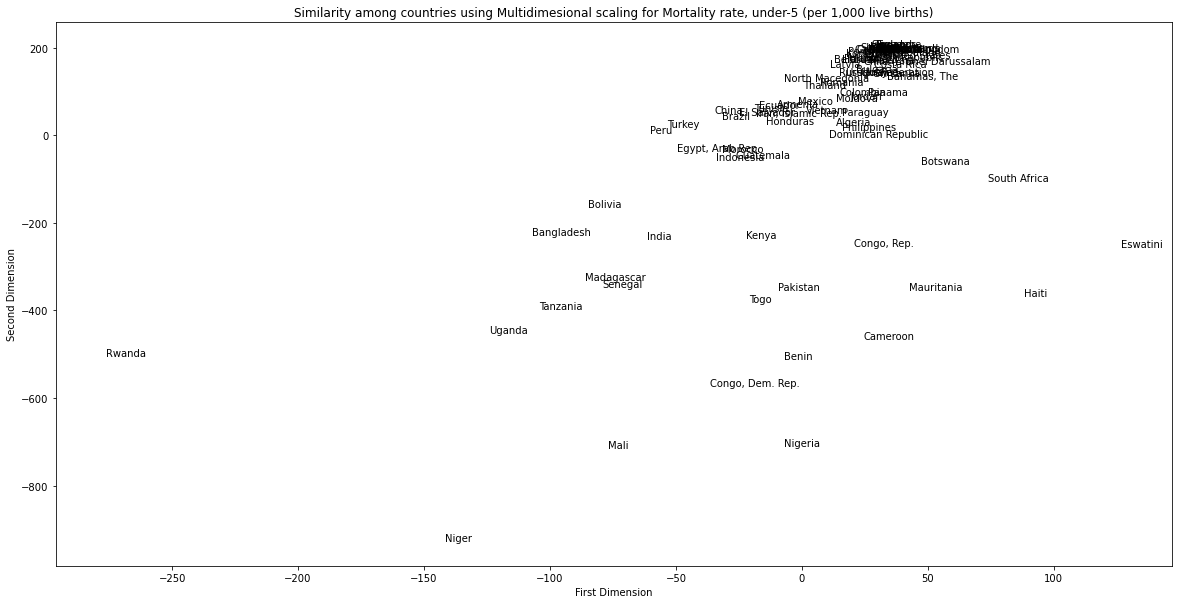

<Figure size 1440x720 with 0 Axes>

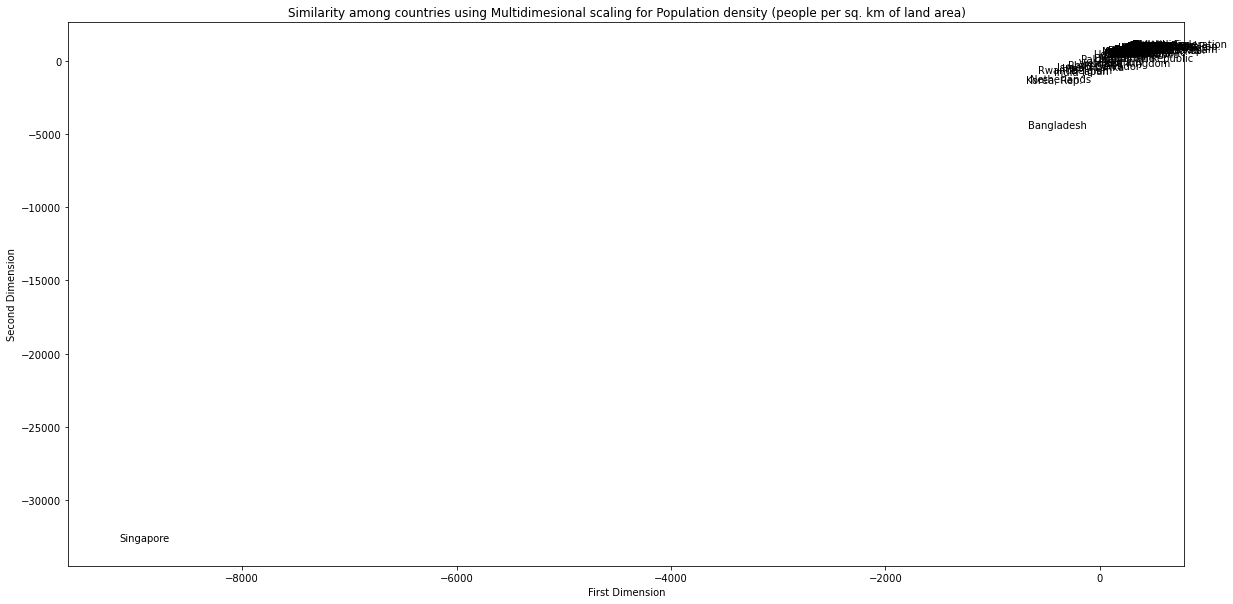

<Figure size 1440x720 with 0 Axes>

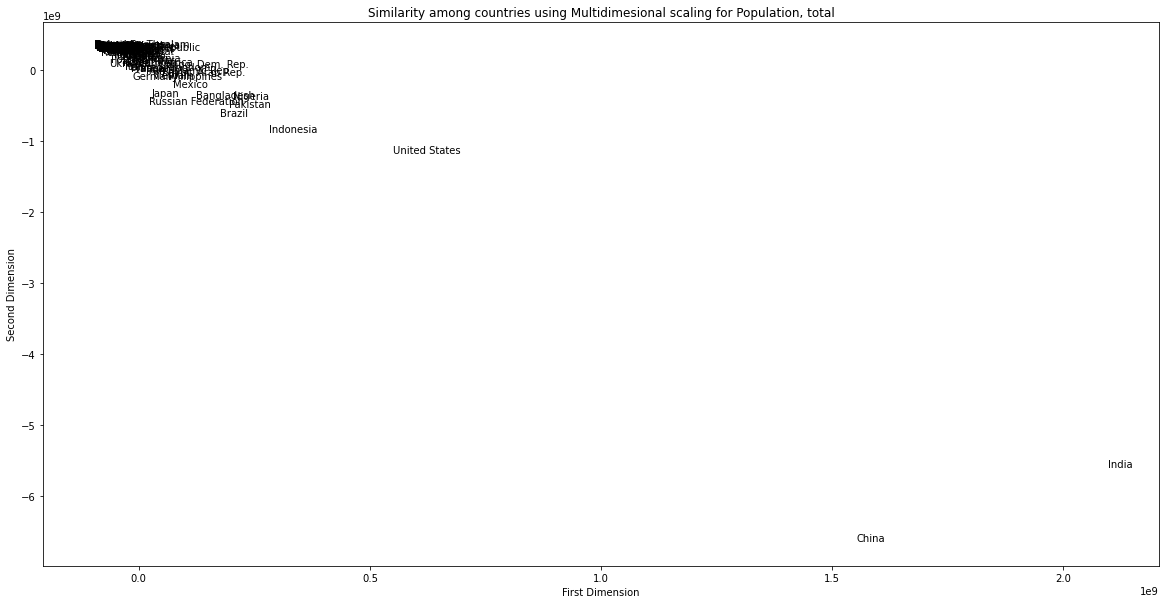

<Figure size 1440x720 with 0 Axes>

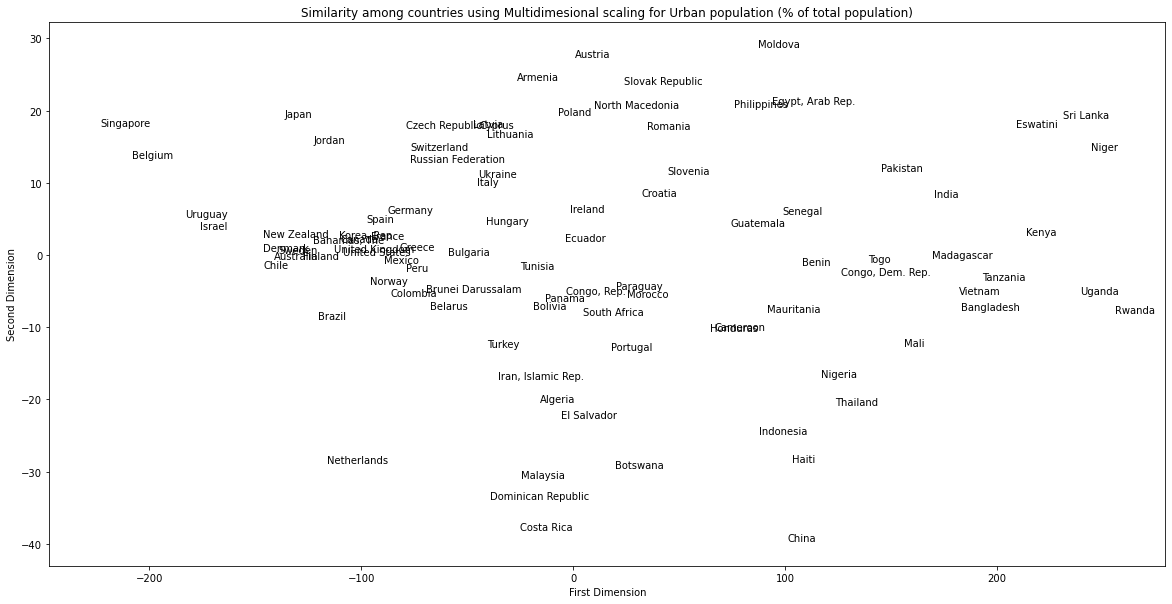

<Figure size 1440x720 with 0 Axes>

In [16]:
for indicator in indicators:
    dis_matrix = prepare_distance_matrix(df, indicator)
    prepare_visualization(dis_matrix, indicator)

In [16]:
indicators[1].split()[0]

'Age'